# Importing Libraries

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from pybaseball import pitching_stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import ModelSpec as MS, summarize, poly

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Importing Data
* Importing data from pybaseball
* Selecting variables that could be useed in regression models

In [4]:
data = pitching_stats(2024,2024)
data.head()

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB% 2,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA,botERA,botOvr CH,botStf CH,botCmd CH,botOvr CU,botStf CU,botCmd CU,botOvr FA,botStf FA,botCmd FA,botOvr SI,botStf SI,botCmd SI,botOvr SL,botStf SL,botCmd SL,botOvr KC,botStf KC,botCmd KC,botOvr FC,botStf FC,botCmd FC,botOvr FS,botStf FS,botCmd FS,botOvr,botStf,botCmd,botxRV100,Stf+ CH,Loc+ CH,Pit+ CH,Stf+ CU,Loc+ CU,Pit+ CU,Stf+ FA,Loc+ FA,Pit+ FA,Stf+ SI,Loc+ SI,Pit+ SI,Stf+ SL,Loc+ SL,Pit+ SL,Stf+ KC,Loc+ KC,Pit+ KC,Stf+ FC,Loc+ FC,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
0,10603,2024,Chris Sale,ATL,35,18,3,6.4,2.38,29,29,0,0,0,0,177.2,702,141,48,47,9,39,0,8,4,1,225,191,143,92,8,925,1893,2818,126,5,4,0,11.40,1.98,5.77,7.14,0.46,0.215,1.01,0.314,0.798,2.09,1.34,0.216,0.448,0.336,0.056,0.063,0.026,0.000,56.3,177.2,NaN,NaN,56.3,$51.4,2.45,2.64,4.04,-9.08,13.12,41.11,4.24,0.95,0.90,0.87,0.83,29,4.37,-0.11,0.455,94.8,0.403,78.7,NaN,NaN,NaN,NaN,0.142,86.9,NaN,NaN,NaN,NaN,0.001,NaN,-5.5,24.4,NaN,NaN,12.1,NaN,NaN,-0.43,2.15,NaN,NaN,3.02,NaN,NaN,0.369,0.646,0.490,0.576,0.812,0.711,0.435,0.694,0.141,0,0,0,57,53,66,0.321,0.056,2.80,6.38,0.30,0.378,NaN,NaN,NaN,NaN,0.072,0.403,NaN,NaN,NaN,0.147,NaN,NaN,NaN,94.8,NaN,NaN,NaN,NaN,94.2,78.6,NaN,NaN,NaN,87.1,NaN,NaN,9.5,NaN,NaN,NaN,NaN,11.1,-5.3,NaN,NaN,NaN,10.1,NaN,NaN,5.8,NaN,NaN,NaN,NaN,1.6,-2.9,NaN,NaN,NaN,0.2,NaN,NaN,-1.3,NaN,NaN,NaN,NaN,-4.0,24.6,NaN,NaN,NaN,12.3,NaN,NaN,-0.12,NaN,NaN,NaN,NaN,-1.99,2.16,NaN,NaN,NaN,2.97,NaN,NaN,0.345,0.623,0.490,0.536,0.802,0.712,0.520,19.6,7.

In [5]:
data.columns

Index(['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G',
       ...
       'Pit+ FC', 'Stf+ FS', 'Loc+ FS', 'Pit+ FS', 'Stuff+', 'Location+',
       'Pitching+', 'Stf+ FO', 'Loc+ FO', 'Pit+ FO'],
      dtype='object', length=393)

In [6]:
pitchers_data = data[['Name','xERA', 'EV', 'Contact%', 'AVG', 'K%', 'FBv', 'CTv', 'CBv', 'CHv', 'SFv', 'KNv', 'Location+']]
pitchers_data.head()

,Name,xERA,EV,Contact%,AVG,K%,FBv,CTv,CBv,CHv,SFv,KNv,Location+
0,Chris Sale,2.79,86.5,0.711,0.215,0.321,94.8,NaN,NaN,86.9,NaN,NaN,111
1,Tarik Skubal,2.72,87.4,0.717,0.200,0.303,96.8,NaN,78.5,86.3,NaN,NaN,100
2,Zack Wheeler,2.85,86.7,0.747,0.191,0.285,95.1,91.1,81.8,NaN,86.2,NaN,104
11,Cole Ragans,3.31,88.3,0.705,0.212,0.293,95.4,91.0,80.8,84.8,NaN,NaN,99
9,Seth Lugo,3.74,88.5,0.795,0.227,0.217,92.2,89.9,79.8,87.5,85.8,NaN,100


In [29]:
# Displaying the number of missing input per row
missing_data = pitchers_data.isna()
for column in pitchers_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Name
Name
False    58
Name: count, dtype: int64

xERA
xERA
False    58
Name: count, dtype: int64

EV
EV
False    58
Name: count, dtype: int64

Contact%
Contact%
False    58
Name: count, dtype: int64

AVG
AVG
False    58
Name: count, dtype: int64

K%
K%
False    58
Name: count, dtype: int64

FBv
FBv
False    58
Name: count, dtype: int64

CTv
CTv
False    58
Name: count, dtype: int64

CBv
CBv
False    58
Name: count, dtype: int64

CHv
CHv
False    58
Name: count, dtype: int64

Location+
Location+
False    58
Name: count, dtype: int64

FB_Grouped
FB_Grouped
False    58
Name: count, dtype: int64



In [30]:
# Dropping KNv and SFv because both variables are missing a lot of inputs, and it would be too difficult to make an appropriate assumption
pitchers_data = pitchers_data.drop(['KNv', 'SFv'], axis=1)
pitchers_data.head()

KeyError: "['KNv', 'SFv'] not found in axis"

In [31]:
# Dropping no name, since it is a string variable
no_name_df = pitchers_data
no_name_df = no_name_df.drop('Name', axis=1)
print(no_name_df.corr())

ValueError: could not convert string to float: 'Third_Quartile'

In [32]:
# Calculating a ratio to calculate cutter speeds for na values
throws_ctv = pitchers_data[['FBv','CTv']].dropna()
print(throws_ctv['FBv'].mean())
print(throws_ctv['CTv'].mean())
ctv_fb_ratio = throws_ctv['CTv'].mean() / throws_ctv['FBv'].mean()
print(ctv_fb_ratio)
pitchers_data['CTv'] = pitchers_data['CTv'].fillna(pitchers_data['FBv']*ctv_fb_ratio)
pitchers_data['CTv'] = pitchers_data['CTv'].round(1)
pitchers_data.head()

93.74310344827587
89.37241379310345
0.9533758805245443


,Name,xERA,EV,Contact%,AVG,K%,FBv,CTv,CBv,CHv,Location+,FB_Grouped
0,Chris Sale,2.79,86.5,0.711,0.215,0.321,94.8,90.4,79.3,86.9,111,Third_Quartile
1,Tarik Skubal,2.72,87.4,0.717,0.200,0.303,96.8,92.3,78.5,86.3,100,Fourth_Quartile
2,Zack Wheeler,2.85,86.7,0.747,0.191,0.285,95.1,91.1,81.8,85.6,104,Third_Quartile
11,Cole Ragans,3.31,88.3,0.705,0.212,0.293,95.4,91.0,80.8,84.8,99,Fourth_Quartile
9,Seth Lugo,3.74,88.5,0.795,0.227,0.217,92.2,89.9,79.8,87.5,100,First_Quartile


In [33]:
# Replacing na values for CBv and CHv with the mean value
cbv_mean = pitchers_data['CBv'].mean()
chv_mean = pitchers_data['CHv'].mean()
pitchers_data['CBv'] = pitchers_data['CBv'].fillna(cbv_mean)
pitchers_data['CHv'] = pitchers_data['CHv'].fillna(chv_mean)
pitchers_data['CBv'] = pitchers_data['CBv'].round(1)
pitchers_data['CHv'] = pitchers_data['CHv'].round(1)
pitchers_data.head()

,Name,xERA,EV,Contact%,AVG,K%,FBv,CTv,CBv,CHv,Location+,FB_Grouped
0,Chris Sale,2.79,86.5,0.711,0.215,0.321,94.8,90.4,79.3,86.9,111,Third_Quartile
1,Tarik Skubal,2.72,87.4,0.717,0.200,0.303,96.8,92.3,78.5,86.3,100,Fourth_Quartile
2,Zack Wheeler,2.85,86.7,0.747,0.191,0.285,95.1,91.1,81.8,85.6,104,Third_Quartile
11,Cole Ragans,3.31,88.3,0.705,0.212,0.293,95.4,91.0,80.8,84.8,99,Fourth_Quartile
9,Seth Lugo,3.74,88.5,0.795,0.227,0.217,92.2,89.9,79.8,87.5,100,First_Quartile


In [34]:
# Creating a csv file of the complete DataFrame
pitchers_data.to_csv('Pitchers_Data.csv', index=False)

# Examining Data Through Graphs and Statistics

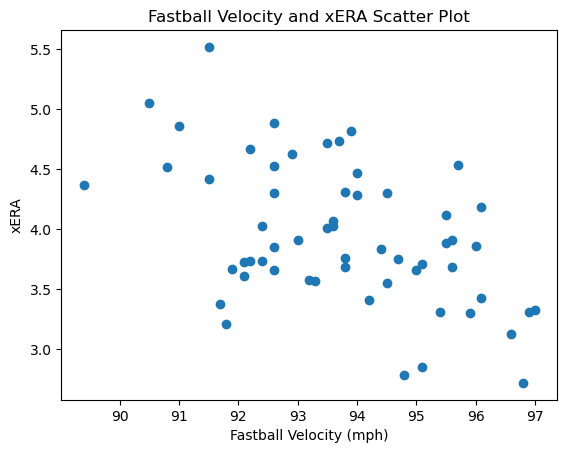

In [28]:
# Examining fastball velocity and xERA through a scatter plot
plt.scatter(pitchers_data['FBv'], pitchers_data['xERA'])
plt.title("Fastball Velocity and xERA Scatter Plot")
plt.xlabel('Fastball Velocity (mph)')
plt.ylabel('xERA')
plt.show()

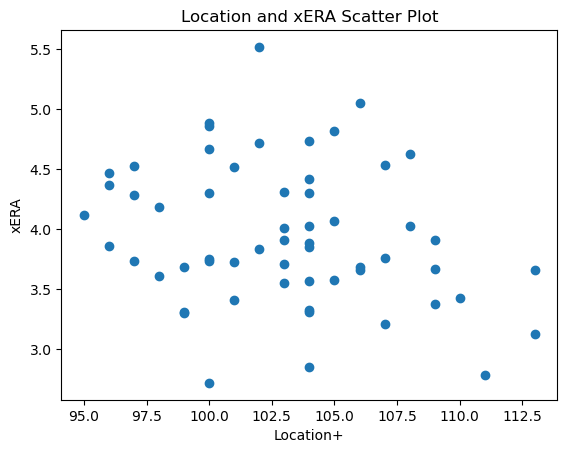

In [27]:
# Examining Location+ and xERA through a scatter plot
plt.scatter(pitchers_data['Location+'], pitchers_data['xERA'])
plt.title('Location and xERA Scatter Plot')
plt.xlabel('Location+')
plt.ylabel('xERA')
plt.show()

              Name  xERA    EV  Contact%    AVG     K%   FBv   CTv   CBv  \
34  Tyler Anderson  4.37  87.2     0.741  0.231  0.186  89.4  84.2  71.7   
54   Austin Gomber  5.05  90.2     0.821  0.271  0.167  90.5  86.3  77.6   
31   Jose Quintana  4.52  88.0     0.801  0.233  0.188  90.8  86.6  77.6   
45     Kyle Gibson  4.86  88.2     0.756  0.248  0.209  91.0  88.7  78.3   
57  Patrick Corbin  5.52  90.8     0.788  0.294  0.182  91.5  85.5  79.3   

     CHv  Location+      FB_Grouped  
34  79.0         96  First_Quartile  
54  81.1        106  First_Quartile  
31  85.8        101  First_Quartile  
45  84.9        100  First_Quartile  
57  81.1        102  First_Quartile  





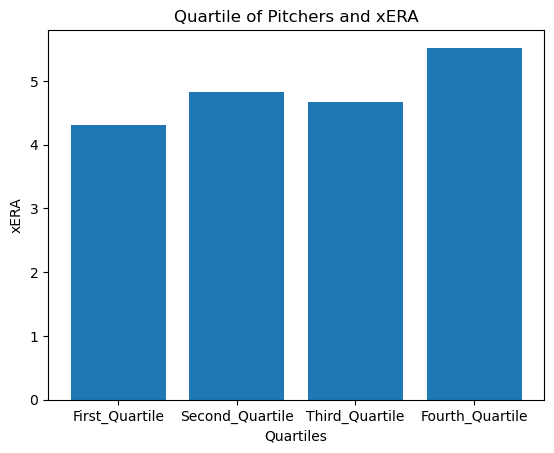

In [26]:
# Examining xERA via fastball velocity
pitchers_data['FBv'].describe()
bins = [0, 92.45, 93.75, 95.1, 98]
labels = ['First_Quartile', 'Second_Quartile', 'Third_Quartile', 'Fourth_Quartile']
pitchers_data['FB_Grouped'] = pd.cut(
    pitchers_data['FBv'],
    bins=bins,
    labels=labels,
    include_lowest = True
    )
bar_graph_fb_grouped_df = pitchers_data.copy()
bar_graph_fb_grouped_df = bar_graph_fb_grouped_df.sort_values(by='FBv', ascending=True)
bar_graph_fb_grouped_df.reset_index(drop=True)
print(bar_graph_fb_grouped_df.head())

print()
print()
print()

plt.bar(bar_graph_fb_grouped_df['FB_Grouped'], pitchers_data['xERA'], )
plt.title("Quartile of Pitchers and xERA")
plt.xlabel("Quartiles")
plt.ylabel("xERA")
plt.show()

In [25]:
# Grouping by FB_Group and examining statistics
fb_by_groups = pitchers_data.groupby('FB_Grouped')['xERA']
fb_by_groups.describe()

/var/folders/y2/ffmphcn51c18jj38jsf88tyc0000gn/T/ipykernel_79414/445575765.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb_by_groups = pitchers_data.groupby('FB_Grouped')['xERA']


,count,mean,std,min,25%,50%,75%,max
FB_Grouped,,,,,,,,
First_Quartile,15.0,4.168000,0.667631,3.21,3.700,4.03,4.595,5.52
Second_Quartile,14.0,4.177857,0.455432,3.57,3.865,4.05,4.605,4.89
Third_Quartile,15.0,3.813333,0.561855,2.79,3.605,3.75,4.295,4.82
Fourth_Quartile,14.0,3.623571,0.488760,2.72,3.310,3.56,3.905,4.54


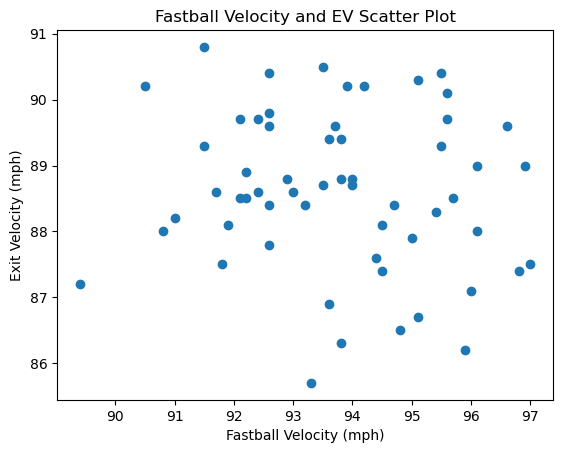

In [22]:
# Examing fastball velocity and EV through a scatter plot
plt.scatter(pitchers_data['FBv'], pitchers_data['EV'])
plt.title('Fastball Velocity and EV Scatter Plot')
plt.xlabel('Fastball Velocity (mph)')
plt.ylabel('Exit Velocity (mph)')
plt.show()

In [35]:
# Statistics on the different fastball groups and exit velocity
fb_by_groups = pitchers_data.groupby('FB_Grouped')['EV']
fb_by_groups.describe()

/var/folders/y2/ffmphcn51c18jj38jsf88tyc0000gn/T/ipykernel_79414/2217302547.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb_by_groups = pitchers_data.groupby('FB_Grouped')['EV']


,count,mean,std,min,25%,50%,75%,max
FB_Grouped,,,,,,,,
First_Quartile,15.0,88.786667,0.994174,87.2,88.150,88.60,89.500,90.8
Second_Quartile,14.0,88.757143,1.320090,85.7,88.400,88.75,89.600,90.5
Third_Quartile,15.0,88.353333,1.319018,86.3,87.500,88.40,89.100,90.3
Fourth_Quartile,14.0,88.578571,1.228619,86.2,87.625,88.75,89.525,90.4


# Conclusion
* There is negative relationship between fastball velocity and expected earned runs allowed
* It does appear that pitchers who throw their fastballs harder have a lower expected earned runs allowed because pitchers in the fourth quartile in fastball velocity have the lowest expected earned runs allowed, which follows the trend of the two variables having a negative correlation relationship
* There appears to be no relationship between fastball velocity and exit velocity.
* Lastly, there is no relationship between location and expected earned runs allowed.